# Final Notebook
By: Christopher Troina and Yassir Abdalla

## Neighborhoods with best/worst crime rates

# Arrest Data
Christopher Troina

In [2]:
import pandas as pd
arrest=pd.read_csv("Arrest Data.csv")
del arrest["AGE"]
del arrest["GENDER"]
del arrest["RACE"]
del arrest["PK"]
del arrest["CCR"]
query_mask=arrest["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
arrest=arrest[query_mask]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside State"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside County"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside City"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Mt. Oliver Boro"]
arrest.dropna(subset=["INCIDENTNEIGHBORHOOD"], inplace=True)
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Golden Triangle/Civic Arena", "Central Business District")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Mt. Oliver Neighborhood", "Mount Oliver")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Troy Hill-Herrs Island", "Troy Hill")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Central North Side", "Central Northside")
arrest.sample(100)

,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
21911,2018-07-03T07:40:00,"600 Block First AV Pittsburgh, PA 15219",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949281,40.452559
10453,2017-07-13T10:30:00,"600 Block First AV Pittsburgh, PA 15219",3929 Retail Theft.,"3700 Block Forbes AV Pittsburgh, PA 15213",Central Oakland,4,405.0,3.0,3.0,-79.957368,40.441024
14043,2017-10-21T01:20:00,"E Carson ST & S 18th ST Pittsburgh, PA 15203",5104 Resisting Arrest or Other Law Enforcement...,"E Carson ST & S 18th ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.980562,40.428759
24280,2018-09-11T17:21:00,"Brackenridge ST & Oak Hill DR Pittsburgh, PA 1...",13(a)(16) Possession of Controlled Substance,"Brackenridge ST & Oak Hill DR Pittsburgh, PA 1...",Central Business District,2,201.0,6.0,3.0,-79.969861,40.444641
24685,2018-09-26T18:46:00,"2100 Block Abel ST Pittsburgh, PA 15210",2701 Simple Assault.,"2100 Block Abel ST Pittsburgh, PA 15210",Arlington,3,1603.0,3.0,3.0,-79.977210,40.416492
...,...,...,...,...,...,...,...,...,...,...,...
13542,2017-09-16T15:57:00,"California AV & Columbus AV Pittsburgh, PA 15233",901 Criminal Attempt / 903 Criminal Conspiracy...,"3200 Block Huxley ST Pittsburgh, PA 15204",Sheraden,6,2022.0,2.0,5.0,-80.062966,40.454384
45368,2020-12-10T09:45:00,"600 Block 1st AV Pittsburgh, PA 15219",5121 Escape.,"Hamilton AV & Hale ST Pittsburgh, PA 15221",Homewood South,5,1304.0,9.0,2.0,-79.887540,40.452358
27638,2019-01-18T11:30:00,"50 Block S 5th ST Pittsburgh, PA 15203",3921 Theft by Unlawful Taking or Disposition. ...,"50 Block S 5th ST Pittsburgh, PA 15203",Knoxville,3,3001.0,7.0,2.0,-79.951503,40.484683
28988,2019-03-05T17:40:00,"300 Block Mt Pleasant RD Pittsburgh, PA 15214",13(a)(31) Marijuana: Possession Small Amount,"300 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,1,2609.0,NaN,NaN,0.000000,0.000000


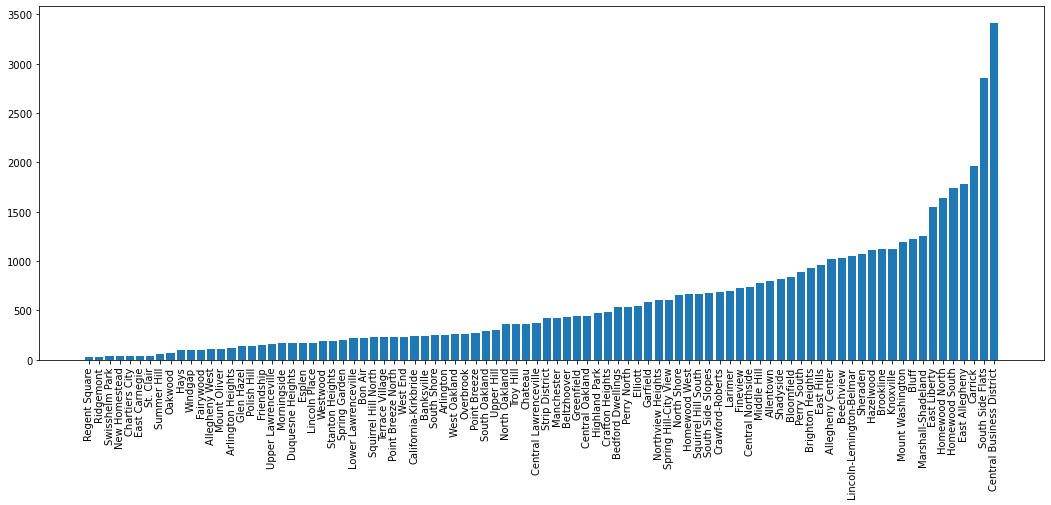

In [3]:
import operator
import matplotlib.pyplot as plt
d=dict()
locations=arrest["INCIDENTNEIGHBORHOOD"].values.tolist()
for x in range(len(locations)):
    if locations[x] in d.keys():
        d[locations[x]]=d[locations[x]]+1
    else:
        d[locations[x]]=1
dsort=sorted(d.items(), key=operator.itemgetter(1))
names, data = zip(*dsort)
plt.figure(figsize=(18,6.5))
plt.bar(names, data)
plt.xticks(rotation=90)
plt.show()

I found that the 3 neighborhoods with the least crime reported are: 
* Regent Square
* Ridgemont
* Swisshelm Park

I found that the 3 neighborhoods with the most crime reported are:
* Central Business District
* South Side Flats
* Carrick

# Police Incident Blotter
Yassir Abdalla

In [11]:
plotter=pd.read_csv("IncidentPlotter.csv")
del plotter["PK"]
del plotter["CCR"]
del plotter["HIERARCHY"]
query_mask= plotter["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
plotter.dropna(subset=["INCIDENTNEIGHBORHOOD"],inplace=True)
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside State"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside County"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Outside City"]
plotter = plotter[plotter.INCIDENTNEIGHBORHOOD != "Mt. Oliver Boro"]

plotter.sample(100)

,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
1909,2022-04-05T16:04:00,"600 Block Ridgemont Dr Pittsburgh, PA 15220",Y,Ridgemont,6,DEAD ON ARRIVAL (DOA),9496 Dead on Arrival (DOA),2016.0,2.0,5.0,-80.038248,40.430733
1311,2022-03-23T21:00:00,"700 Block Edmond St Pittsburgh, PA 15224",N,Bloomfield,5,CRIM MISCHIEF,3304 Criminal Mischief.,802.0,7.0,2.0,-79.949983,40.458940
2779,2022-03-29T10:30:00,"2700 Block West Liberty Ave Pittsburgh, PA 15226",N,Brookline,6,CRIM MISCHIEF,3304 Criminal Mischief.,1919.0,7.0,6.0,-79.975618,40.454856
79,2022-04-10T17:43:00,"200 Block Mc Kinley St Pittsburgh, PA 15210",N,Knoxville,3,99,"601.11(a) Littering and Dumping; Any waste, da...",3001.0,3.0,5.0,-79.991151,40.408755
2202,2022-04-19T16:00:00,"4200 Block Murray Ave Pittsburgh, PA 15217",N,Greenfield,4,CRIMINAL MISCHIEF,3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...,1517.0,5.0,3.0,-79.928674,40.423190
...,...,...,...,...,...,...,...,...,...,...,...,...
749,2022-03-25T15:30:00,"1200 Block Brookline Blvd Pittsburgh, PA 15226",N,Brookline,6,IDENTITY THEFT,4105(a)(1) Bad Checks / 4120 Identity Theft,1918.0,4.0,5.0,-80.012994,40.391944
1215,2022-04-21T21:15:00,"Minott Trl & Sorento St Pittsburgh, PA 15212",N,Marshall-Shadeland,1,99,8106 Shots Fired,2715.0,1.0,1.0,-80.030214,40.475789
1316,2022-04-09T11:00:00,"400 Block Hastings St Pittsburgh, PA 15206",N,Point Breeze,4,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1404.0,8.0,3.0,-79.914211,40.450176
1728,2022-04-01T23:00:00,"2200 Block Wilner Dr Pittsburgh, PA 15221",N,Lincoln-Lemington-Belmar,5,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,1203.0,NaN,NaN,NaN,NaN


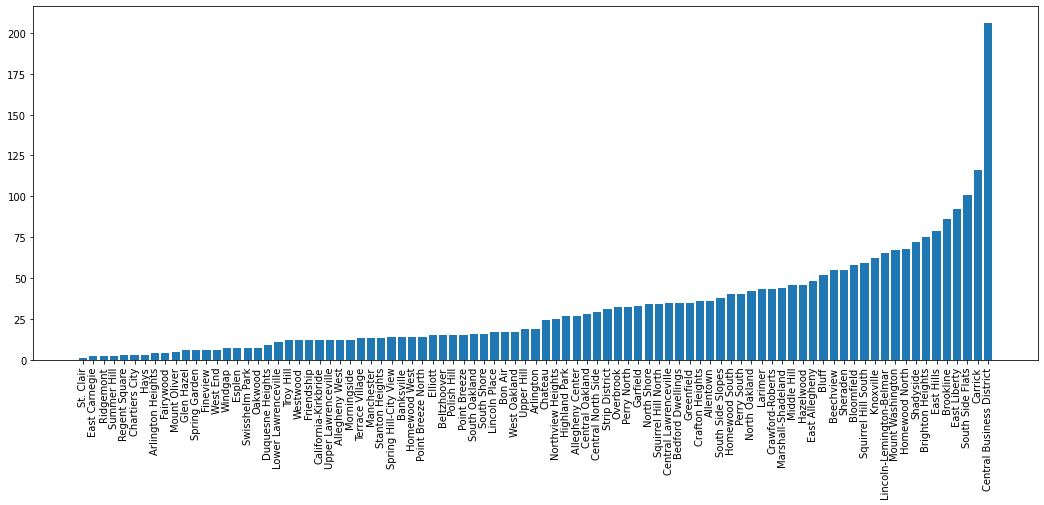

In [12]:
d=dict()
villian=plotter["INCIDENTNEIGHBORHOOD"].values.tolist()
for x in range(len(villian)):
    if villian[x] in d.keys():
        d[villian[x]]=d[villian[x]]+1
    else:
        d[villian[x]]=1
dsort=sorted(d.items(), key=operator.itemgetter(1))
names, data = zip(*dsort)
plt.figure(figsize=(18,6.5))
plt.bar(names, data)
plt.xticks(rotation=90)
plt.show()

BEST 3 Neighborhoods for an alien to enhabit ACCORDING TO THE METRIC:
* St. Clair
* East Carnegie
* Ridgemont

WORST 3 Neighborhoods for an alien to enhabit ACCORDING TO THE METRIC
* Central Buisness District
* Carrick
* South Side Flats

# Non-Traffic Citations
Christopher Troina

In [4]:
import pandas as pd
cite=pd.read_csv("Citations.csv")
del cite["AGE"]
del cite["GENDER"]
del cite["RACE"]
del cite["PK"]
del cite["CCR"]
query_mask=cite["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
cite=cite[query_mask]
cite = cite[cite.NEIGHBORHOOD != "Outside State"]
cite = cite[cite.NEIGHBORHOOD != "Outside County"]
cite = cite[cite.NEIGHBORHOOD != "Outside City"]
cite = cite[cite.NEIGHBORHOOD != "Mt. Oliver Boro"]
cite.dropna(subset=["NEIGHBORHOOD"], inplace=True)
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Golden Triangle/Civic Arena", "Central Business District")
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Mt. Oliver Neighborhood", "Mount Oliver")
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Troy Hill-Herrs Island", "Troy Hill")
cite["NEIGHBORHOOD"]=cite["NEIGHBORHOOD"].replace("Central North Side", "Central Northside")
cite.sample(100)

,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
12622,2021-12-30T11:03:00,"20 Block NEWETT ST PITTSBURGH, PA",633.05 Rabies Vaccination,Carrick,3,2901,4.0,3.0,-79.989010,40.397200
8696,2019-08-31T02:04:00,"ATWOOD ST & SENNOTT ST PITTSBURGH, PA",601.08(a) Alcohol or Liquor Consumption on Str...,Central Oakland,4,405,3.0,3.0,-79.956870,40.440490
10741,2019-12-05T08:10:00,"LINCOLN AV & CAMPANIA AV PITTSBURGH, PA",627.02(b)(i) Possessing a small amount of mari...,Lincoln-Lemington-Belmar,5,1201,9.0,2.0,-79.890958,40.472261
12605,2021-12-22T11:45:00,"IRVINE ST & GREENFIELD AV PITTSBURGH, PA",3503(b)(1)(ii) Defiant Trespass Notice Posted ...,Hazelwood,4,1501,5.0,3.0,-79.952039,40.424924
2233,2017-05-05T19:55:00,"FEDERAL ST & W GENERAL ROBINSON ST PITTSBURGH,...",726.01 (a) Resale of tickets without license u...,North Shore,1,2205,1.0,6.0,-80.004250,40.448246
...,...,...,...,...,...,...,...,...,...,...
1642,2017-03-11T18:52:00,"1500 Block E CARSON ST PITTSBURGH, PA",5505 Public Drunkenness,South Side Flats,3,1702,3.0,3.0,-79.983307,40.428685
9770,2020-01-21T22:30:00,"300 Block 3RD AV PITTSBURGH, PA","2709(a)(1) Harassment by Physical Contact, or ...",Central Business District,2,201,6.0,6.0,-80.001614,40.438866
3771,2017-11-01T01:22:00,"S 12TH ST & BEDFORD SQ PITTSBURGH, PA",601.12 Interference with Official Duties,South Side Flats,3,1702,3.0,3.0,-79.986451,40.429709
2045,2017-04-18T12:55:00,"GRAY ST & SOUTHERN AV PITTSBURGH, PA",601.08(a) Alcohol or Liquor Consumption on Str...,Mount Washington,3,1914,2.0,5.0,-80.009040,40.426641


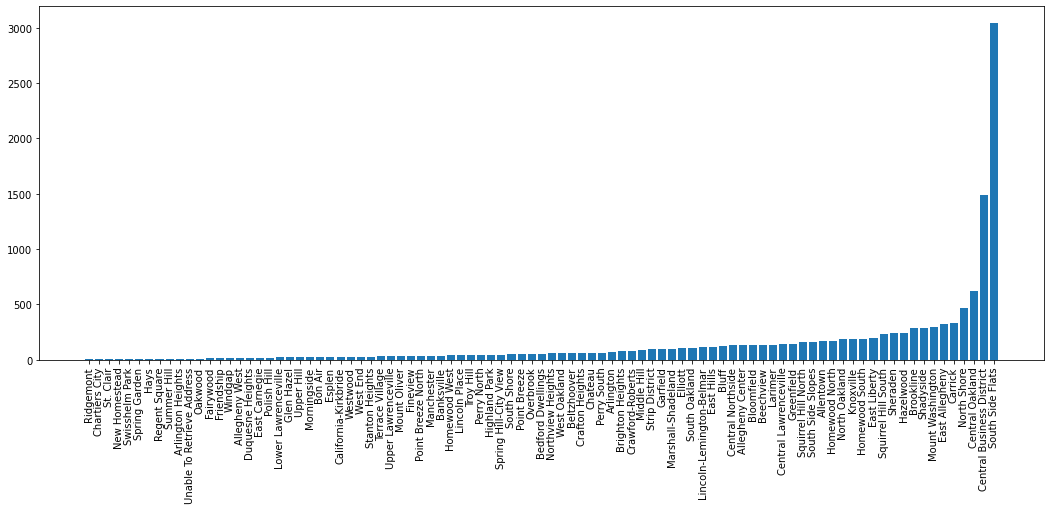

In [9]:
dcite=dict()
neighs=cite["NEIGHBORHOOD"].values.tolist()
for x in range(len(neighs)):
    if neighs[x] in dcite.keys():
        dcite[neighs[x]]=dcite[neighs[x]]+1
    else:
        dcite[neighs[x]]=1
dcsort=sorted(dcite.items(), key=operator.itemgetter(1))
name2, data2 = zip(*dcsort)
plt.figure(figsize=(18,6.5))
plt.bar(name2, data2)
plt.xticks(rotation=90)
plt.show()

I found that the 3 neighborhoods with the least citations are:: 
* Ridgemont
* Chartiers City
* St. Clair

I found that the 3 neighborhoods with the most citations are::
* South Side Flats
* Central Business District
* Central Oakland

# Conlcusion
We decided that the Neighborhood with the least crime was Ridgemont as it appeared in the top three of all of the metrics.

We decided that the Neighborhood with the most crime was the Central Business District, as it appeared in the bottom three of all the metrics.